# Health Insurance Prediction

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Loading the Data

In [2]:
data = pd.read_csv('./dataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

### Understanding the Data

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset has 1338 rows and 7 columns


In [6]:
print('Number of NaN values: {}'.format(data.isna().any().sum()))
print('Number of null values: {}'.format(data.isnull().any().sum()))

Number of NaN values: 0
Number of null values: 0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Checking for duplicates in the dataset
data.duplicated().values.any()

True

In [9]:
print('Number of duplicate values: {}'.format(data.duplicated().any().sum()))

Number of duplicate values: 1


In [10]:
# Checking for the duplicated entry
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
# Drop the duplicated entry
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(1337, 7)

In [13]:
# Confirm that duplicate is dropped
print(data.duplicated().values.any())
print('Number of duplicate values: {}'.format(data.duplicated().values.sum()))

False
Number of duplicate values: 0


### Descriptive Statistics

In [14]:
data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### Distribution of Insurance Charges

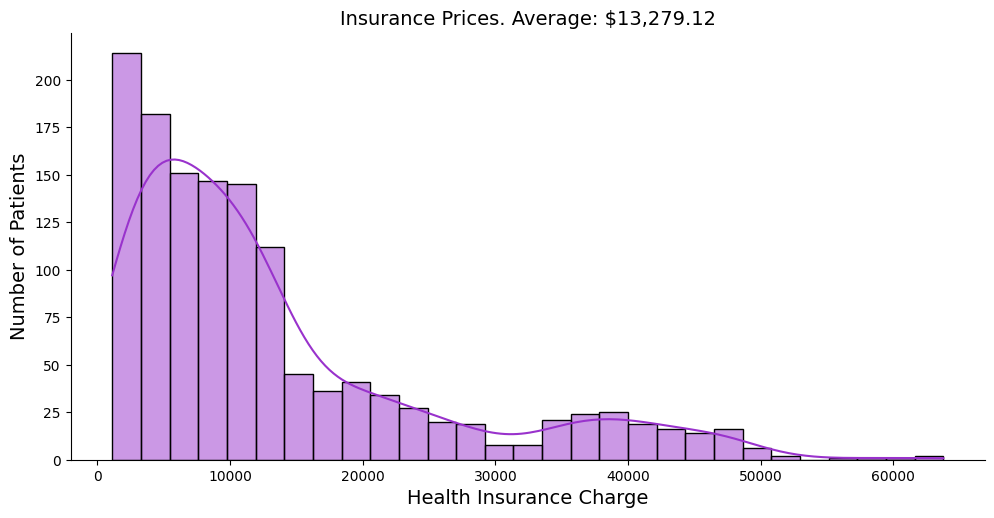

In [15]:
sns.displot(
    data=data,
    x='charges',
    kde=True,
    aspect=2,
    color='darkorchid'
)

plt.title('Insurance Prices. Average: ${:,.2f}'.format(data.charges.mean()), fontsize=14)
plt.xlabel('Health Insurance Charge', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show()

#### Distribution of Patient Ages

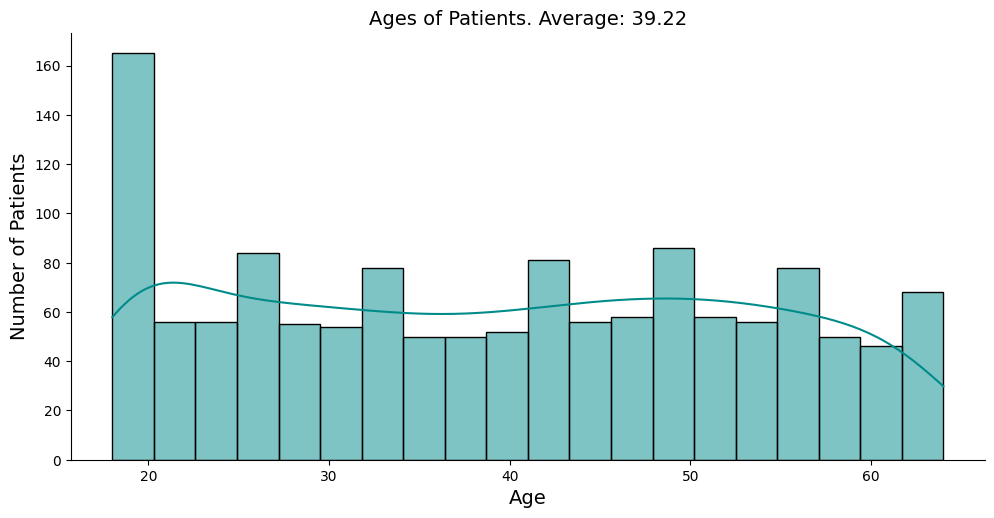

In [16]:
sns.displot(
    data=data,
    x='age',
    bins=20,
    kde=True,
    aspect=2,
    color='darkcyan'
)

plt.title('Ages of Patients. Average: {:.2f}'.format(data.age.mean()), fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.show()

#### Analyzing Statistics By Gender

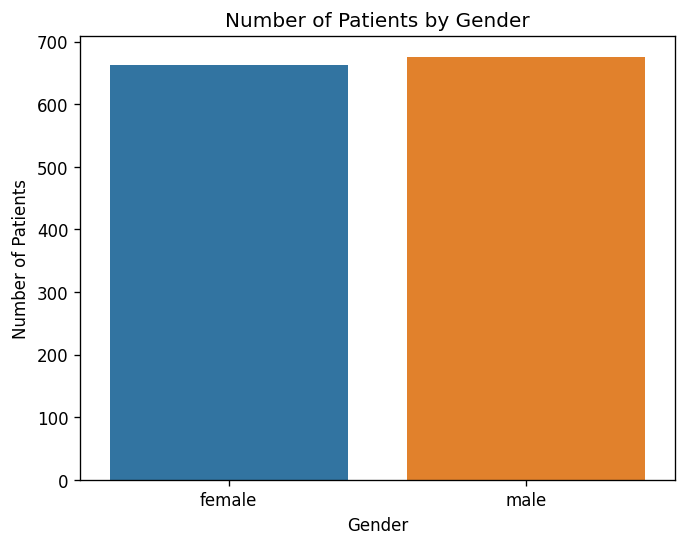

In [17]:
# Gender distribution in the dataset
plt.figure(dpi=120)

sns.countplot(
    data,
    x='sex',
    hue='sex',
)

plt.title('Number of Patients by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()

The dataset has more male patients in the dataset than female

In [18]:
# Average cost of Insurance by Gender
gender_price = data.groupby('sex', as_index=False).agg({'charges': pd.Series.mean})

In [19]:
male_avg = gender_price[gender_price['sex'] == 'male'].values[0][1]
female_avg = gender_price[gender_price['sex'] == 'female'].values[0][1]

In [20]:
sex_bar = px.bar(
    gender_price,
    x='sex',
    y='charges',
    color='charges',
    title='Average Cost of Insurance by Gender. Male: ${:,.2f}  Female ${:,.2f}'.format(male_avg, female_avg),
    height=550,
    width=1000,
)

sex_bar.update_layout(
    xaxis_title='Gender',
    yaxis_title='Cost of Insurance',
    coloraxis_showscale=False,
)

sex_bar.show()

We can see that on an average, insurance costs more for males than females according the dataset

In [21]:
hist = px.histogram(
    data,
    x='sex',
    color='smoker',
    color_discrete_sequence=px.colors.qualitative.T10,
    barmode='group',
    title='Distribution of Smokers by Gender',
    height=550,
    width=1000,
)

hist.update_layout(
    xaxis_title='Gender',
    yaxis_title='Number of Patients',
)

hist.show()

We can see that there are more male smokers than female, and more female non smokers than male

#### Average Cost of Insurace for Smokers / Non-smokers

In [22]:
smoker_price = data.groupby('smoker', as_index=False).agg({'charges': pd.Series.mean})

In [23]:
smoker_avg = smoker_price[smoker_price['smoker'] == 'yes'].values[0][1]
non_smoker_avg = smoker_price[smoker_price['smoker'] == 'no'].values[0][1]

In [24]:
smoke_bar = px.bar(
    smoker_price,
    x='smoker',
    y='charges',
    color='charges',
    color_continuous_scale='Aggrnyl',
    title='Average Cost of Insurance.\n Smoker: ${:,.2f} vs Non smoker: ${:,.2f}'.format(smoker_avg, non_smoker_avg),
    height=550,
    width=1000,
)

smoke_bar.update_layout(
    xaxis_title='Smoker?',
    yaxis_title='Cost of Insurance',
    coloraxis_showscale=False,
)

smoke_bar.show()

We can see that the average price of insurance is a lot more for patients that smoke 

#### Analyzing Statistics By Region

In [25]:
# Number of Regions
print(f'There are {len(data.region.value_counts())} regions in the dataset')
data.region.value_counts()

There are 4 regions in the dataset


region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

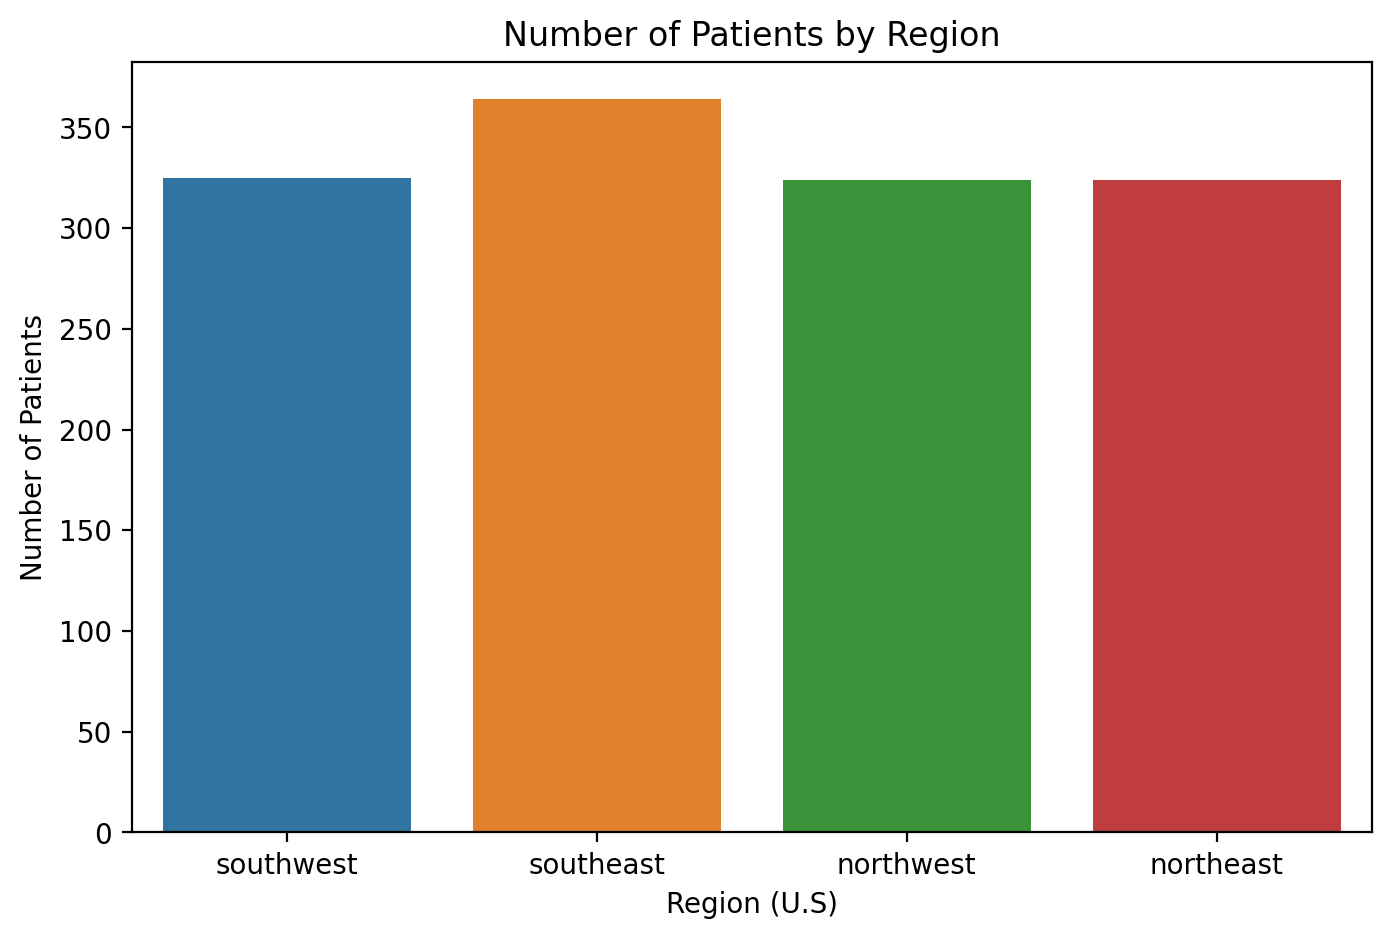

In [26]:
# Distribution of patients across the regions
plt.figure(figsize=(8, 5), dpi=200)

sns.countplot(
    data,
    x='region',
    hue='region',
)

plt.xlabel('Region (U.S)')
plt.ylabel('Number of Patients')
plt.title('Number of Patients by Region')
plt.show()

In [27]:
# Distribution of Smokers by Region
chart = px.histogram(
    data,
    x='region',
    color='smoker',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    barmode='group',
    title='Distribution of Smokers by Region',
    height=550,
    width=1000,
)

chart.update_layout(
    xaxis_title='Region (U.S)',
    yaxis_title='Number of Patients',
)

chart.show()

- There are more non smokers in every region in the dataset
- The southeast region has the most number of smokers
- The southwest and northwest regions both have the same number of smokers

Average costs for male, female, smoker
which region has more smokers
smokers by gender
bmi by sex

#### Analyzing Patient BMI 

In [28]:
# Creating categories for bmi values
bmi_cat = []
for i in data.bmi.values:
    if i < 18.5:
        bmi_cat.append('underweight')
    elif i >= 18.5 and i < 25:
        bmi_cat.append('normal weight')
    else:
        bmi_cat.append('overweight')

In [29]:
# Insert a column for the bmi categories
data.insert(4, column='bmi_cat', value=bmi_cat)

In [32]:
# Checking if column corresponds with bmi value
data.sample(10)

,age,sex,bmi,children,bmi_cat,smoker,region,charges
1100,33,female,19.095,2,normal weight,yes,northeast,16776.30405
1101,53,male,28.600,3,overweight,no,southwest,11253.42100
208,63,female,31.800,0,overweight,no,southwest,13880.94900
747,19,male,21.755,0,normal weight,no,northwest,1627.28245
829,39,male,21.850,1,normal weight,no,northwest,6117.49450
1018,54,female,35.815,3,overweight,no,northwest,12495.29085
589,38,female,30.690,1,overweight,no,southeast,5976.83110
574,57,female,34.295,2,overweight,no,northeast,13224.05705
993,38,male,28.270,1,overweight,no,southeast,5484.46730
57,18,male,31.680,2,overweight,yes,southeast,34303.16720


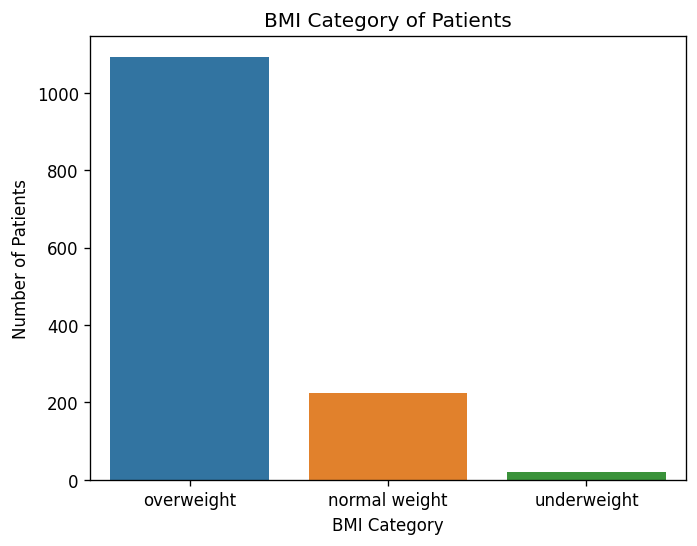

In [33]:
# Visualizing the distribution of patients bmi
plt.figure(dpi=120)

sns.countplot(
    data,
    x='bmi_cat',
    hue='bmi_cat',
)

plt.title('BMI Category of Patients')
plt.xlabel('BMI Category')
plt.ylabel('Number of Patients')
plt.show()

WOW! Most of the patients in the dataset are overweight

In [35]:
data.drop('bmi_cat', axis=1, inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Checking for Feature correlations

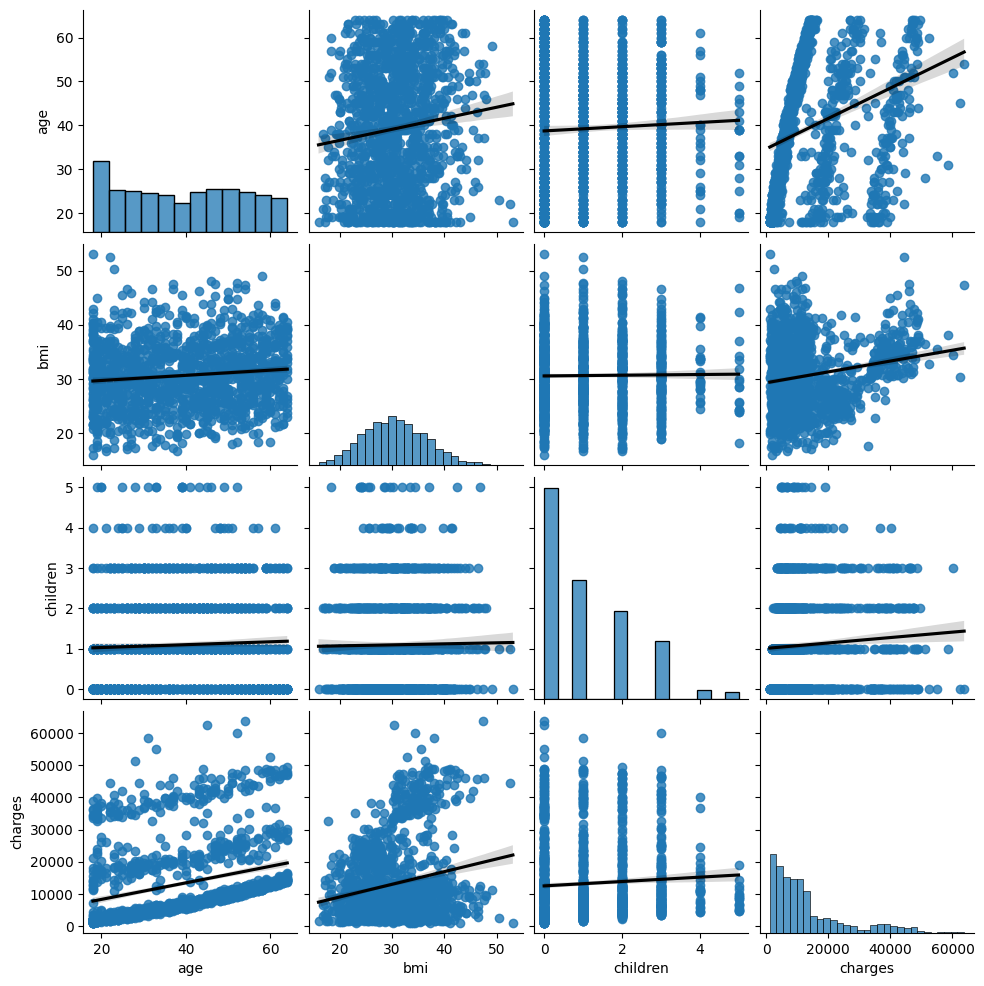

In [31]:
# Checking for correlations between features in the data
sns.pairplot(data, kind='reg', plot_kws={'line_kws': {'color': 'black'}})
plt.show()

No visible correlations betweeen features of the dataset

## Machine Learning